<div style="text-align:right;">Justine Charrel - Master 1 Internship</div>

This script calculate the differences between the radiosoundings of IFS and them of MOSAiC. It plots their distribution and profiles.

### IMPORT

In [29]:
from netCDF4 import Dataset as ncfile
import numpy as np
from netCDF4 import num2date
import matplotlib.dates as dates
import statistics
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import cmath

### READ DATA

In [2]:
ppidir = '/lustre/storeB/users/justinec/master_internship/data/IFS_MOSAiC/'
data_link  = ppidir + 'concatenated_IFS_MOSAiC.nc'

data = ncfile(data_link,'r')    #dataset of radiosoundings of MOSAiC and ERA5

In [3]:
pres = data.variables['pres'][:]
lat = data.variables['lat_mosaic'][:] 
lon = data.variables['lon_mosaic'][:]
time = data.variables['time_mosaic'][:]
ifs_temp = data.variables['temp_ifs'][:]
ifs_rh = data.variables['rh_ifs'][:]
ifs_wdir = data.variables['wdir_ifs'][:]
ifs_wspeed = data.variables['wspeed_ifs'][:]
mosaic_temp = data.variables['temp_mosaic'][:]
mosaic_rh = data.variables['rh_mosaic'][:]
mosaic_wdir = data.variables['wdir_mosaic'][:]
mosaic_wspeed = data.variables['wspeed_mosaic'][:]
forecast_time = data.variables['forecast_time'][:]
start_time = data.variables['start_time'][:]

In [4]:
# List of start time, forecast time and lead time

indx=[] ; forecast_time_datetime=[] ; start_time_datetime=[] ; timedelta=[] ; lead_time_list=[]              
for i in range(0, len(forecast_time)) :
    forecast_time_datetime.append(datetime.strptime(str(forecast_time[i])[:-2], '%Y%m%d%H%M%S'))
    start_time_datetime.append(datetime.strptime(str(start_time[i])[:-2], '%Y%m%d%H%M%S'))
    timedelta.append(forecast_time_datetime[i]-start_time_datetime[i])
    total_seconds = timedelta[i].total_seconds()     # Convert timedelta into seconds
    lead_time_list.append(int(total_seconds/(60*60)))     # Convert timedelta into hours 

In [5]:
lead_time=[0,6,12,18,24,30,36,42,48,54,60,66]

In [6]:
mosaic_temp = mosaic_temp.filled() #replace masked values by NaN values
mosaic_rh = mosaic_rh.filled()
mosaic_wdir = mosaic_wdir.filled()
mosaic_wspeed = mosaic_wspeed.filled()

### FUNCTIONS

In [27]:
'''Function that find the indexes of a given lead time'''
def indx_lead_time(leadtime) :
    indx = [i for i, x in enumerate(lead_time_list) if x == leadtime]
    return(indx)
# -----------------------------------------------------------------------------------------

# -----------------------------------------------------------------------------------------
'''Function that calculate the biases of temperature, relative humidity, wind speed and wind direction for a given lead time'''
def bias_lead_time(indx) :
    temp_bias_lt = ifs_temp[indx]-mosaic_temp[indx]
    rh_bias_lt = ifs_rh[indx]-mosaic_rh[indx]
    wspeed_bias_lt = ifs_wspeed[indx]-mosaic_wspeed[indx]
    wdir_bias_lt = ifs_wdir[indx]-mosaic_wdir[indx]
    for i in range(len(wdir_bias_lt)) :
        for n in range(len(wdir_bias_lt[i])) :
            if wdir_bias_lt[i][n] > 180 :
                wdir_bias_lt[i][n] = wdir_bias_lt[i][n]-360
            if wdir_bias_lt[i][n] < -180 :
                wdir_bias_lt[i][n] = wdir_bias_lt[i][n]+360
    return temp_bias_lt, rh_bias_lt, wspeed_bias_lt, wdir_bias_lt
# -----------------------------------------------------------------------------------------

# -----------------------------------------------------------------------------------------
'''Function that sort the values of all radiosondes by 4 pressure levels for a given variable'''
def varlevel(var) :
    var_1000 = []
    var_900 = []
    var_600 = []
    var_300 = []
    for i in range(len(var)) :
        var_1000.append(var[i][0])
        var_900.append(var[i][2])
        var_600.append(var[i][8])
        var_300.append(var[i][14])
    return(var_1000,var_900,var_600,var_300)
# -----------------------------------------------------------------------------------------

# -----------------------------------------------------------------------------------------
def plotdistribution() :
    parameters = {'axes.labelsize':20, 'axes.titlesize':20, 'legend.fontsize':16, 'xtick.labelsize':20, 'ytick.labelsize':20, 
                      'legend.title_fontsize':20, 'figure.titlesize':25}
    plt.rcParams.update(parameters)
    fig, axs = plt.subplots(2,2,figsize=(30,15))
    sns.histplot(temp_bias_300, binrange=(-10,10), binwidth=0.1, label='300 hPa', ax=axs[0,0], alpha=0.4, color='purple')
    sns.histplot(temp_bias_600, binrange=(-10,10), binwidth=0.1, label='600 hPa', ax=axs[0,0], alpha=0.4, color='yellow')
    sns.histplot(temp_bias_900, binrange=(-10,10), binwidth=0.1, label='900 hPa', ax=axs[0,0], alpha=0.4, color='green')
    sns.histplot(temp_bias_1000, binrange=(-10,10), binwidth=0.1, label='1000 hPa', ax=axs[0,0], alpha=0.4, color='red')
    axs[0,0].set(ylabel='Number of occurences', xlabel='T difference [K]')
    axs[0,0].legend()

    sns.histplot(rh_bias_300, binrange=(-50,100), binwidth=1, label='300 hPa', ax=axs[0,1], alpha=0.4, color='purple')
    sns.histplot(rh_bias_600, binrange=(-50,100), binwidth=1, label='600 hPa', ax=axs[0,1], alpha=0.4, color='yellow')
    sns.histplot(rh_bias_900, binrange=(-50,100), binwidth=1, label='900 hPa', ax=axs[0,1], alpha=0.4, color='green')
    sns.histplot(rh_bias_1000, binrange=(-50,100), binwidth=1, label='1000 hPa', ax=axs[0,1], alpha=0.4, color='red')
    axs[0,1].set(ylabel='', xlabel='RH difference [%]')
    axs[0,1].legend()

    sns.histplot(wdir_bias_300, binrange=(-150,150), binwidth=2, label='300 hPa', ax=axs[1,0], alpha=0.4, color='purple')
    sns.histplot(wdir_bias_600, binrange=(-150,150), binwidth=2, label='600 hPa', ax=axs[1,0], alpha=0.4, color='yellow')
    sns.histplot(wdir_bias_900, binrange=(-150,150), binwidth=2, label='900 hPa', ax=axs[1,0], alpha=0.4, color='green')
    sns.histplot(wdir_bias_1000, binrange=(-150,150), binwidth=2, label='1000 hPa', ax=axs[1,0], alpha=0.4, color='red')
    axs[1,0].set(ylabel='Number of occurences', xlabel='Wind direction difference [degree]')
    axs[1,0].legend()

    sns.histplot(wspeed_bias_300, binrange=(-15,15), binwidth=0.2, label='300 hPa', ax=axs[1,1], alpha=0.4, color='purple')
    sns.histplot(wspeed_bias_600, binrange=(-15,15), binwidth=0.2, label='600 hPa', ax=axs[1,1], alpha=0.4, color='yellow')
    sns.histplot(wspeed_bias_900, binrange=(-15,15), binwidth=0.2, label='900 hPa', ax=axs[1,1], alpha=0.4, color='green')
    sns.histplot(wspeed_bias_1000, binrange=(-15,15), binwidth=0.2, label='1000 hPa', ax=axs[1,1], alpha=0.4, color='red')
    axs[1,1].set(ylabel='', xlabel=r'Wind speed difference [$m.s^{-1}$]')
    axs[1,1].legend()

    fig.suptitle('Distribution of differences betweeen IFS and MOSAiC, lead time = '+str(lead_time[i]))
    fig.tight_layout()
    fig.subplots_adjust(top=0.93)
    path_fig = '/lustre/storeB/users/justinec/master_internship/figures/ifs_mosaic_biases/'
    plt.savefig(path_fig+'fig_biases_distribution_'+str(lead_time[i])+'.png')
    plt.close()
# -----------------------------------------------------------------------------------------

# -----------------------------------------------------------------------------------------   
'''This function calculate the differences between IFS and MOSAiC for a circular variable, the wind direction'''
def circular_correlation_coefficient(variable1, variable2):
        #
        var1_rad = variable1 * np.pi / 180
        var2_rad = variable2 * np.pi / 180
        #
        var1_com = np.full(np.shape(variable1), np.nan, dtype = complex)
        var2_com = np.full(np.shape(variable2), np.nan, dtype = complex)
        for i in range(0, len(variable1)):
                var1_com[i] = cmath.rect(1, var1_rad[i])
                var2_com[i] = cmath.rect(1, var2_rad[i])
        #
        var1_com_mean = np.nanmean(var1_com)
        var2_com_mean = np.nanmean(var2_com)
        #
        var1_rad_mean = cmath.phase(var1_com_mean)
        if var1_rad_mean < 0:
                var1_rad_mean = var1_rad_mean + 2 * np.pi
        #
        var2_rad_mean = cmath.phase(var2_com_mean)
        if var2_rad_mean < 0:
                var2_rad_mean = var2_rad_mean + 2 * np.pi
        #
        diff_var1 = var1_rad - var1_rad_mean
        diff_var2 = var2_rad - var2_rad_mean
        #
        Rcc = np.nansum(np.sin(diff_var1) * np.sin(diff_var2)) / np.sqrt(np.nansum(np.sin(diff_var1) ** 2) * np.nansum(np.sin(diff_var2) ** 2))
        #
        return Rcc

### DISTRIBUTION OF THE BIASES FOR EACH LEAD TIME

In [56]:
for i in range(len(lead_time)) :
    indx = indx_lead_time(lead_time[i])
    temp_bias_lt, rh_bias_lt, wspeed_bias_lt, wdir_bias_lt = bias_lead_time(indx)
    temp_bias_1000, temp_bias_900, temp_bias_600, temp_bias_300 = varlevel(temp_bias_lt)
    rh_bias_1000, rh_bias_900, rh_bias_600, rh_bias_300 = varlevel(rh_bias_lt)
    wdir_bias_1000, wdir_bias_900, wdir_bias_600, wdir_bias_300 = varlevel(wdir_bias_lt)
    wspeed_bias_1000, wspeed_bias_900, wspeed_bias_600, wspeed_bias_300 = varlevel(wspeed_bias_lt)
    #plotdistribution()

### CALCULATE THE BIASES BETWEEN IFS AND MOSAiC

In [8]:
temp_bias = ifs_temp-mosaic_temp
rh_bias = ifs_rh-mosaic_rh
wspeed_bias = ifs_wspeed-mosaic_wspeed

In [10]:
# need to use direction errors
wdir_bias = ifs_wdir-mosaic_wdir
for i in range(len(wdir_bias)) :
    for n in range(len(wdir_bias[i])) :
        if wdir_bias[i][n] > 180 :
            wdir_bias[i][n] = wdir_bias[i][n]-360
        if wdir_bias[i][n] < -180 :
            wdir_bias[i][n] = wdir_bias[i][n]+360

### CALCULATE MEAN, STANDARD DEVIATION AND CORRELATION COEFFICIENT OF EVERY PRESSURE LEVEL FOR ALL RADIOSONDES

In [11]:
def meanstd(var) :
    mean = np.nanmean(var, axis=0)
    std  = np.nanstd(temp_bias, axis=0)
    return(mean,std)

In [12]:
mean_temp_bias, std_temp_bias = meanstd(temp_bias)
mean_rh_bias, std_rh_bias = meanstd(rh_bias)
mean_wdir_bias, std_wdir_bias = meanstd(wdir_bias)
mean_wspeed_bias, std_wspeed_bias = meanstd(wspeed_bias)

In [13]:
def corr_coef(mosaic,ifs) :
    mosaic_level = [] ; ifs_level = [] ; r=[]
    for n in range(len(mosaic[0])) :
        for i in range(len(mosaic)) :
            mosaic_level.append(mosaic[i][n])
            ifs_level.append(ifs[i][n])
        r.append(np.ma.corrcoef(np.ma.masked_invalid(mosaic_level), np.ma.masked_invalid(ifs_level))[0,1])
    return r

In [14]:
r_temp = corr_coef(mosaic_temp,ifs_temp)
r_rh = corr_coef(mosaic_rh,ifs_rh)
r_wspeed = corr_coef(mosaic_wspeed,ifs_wspeed)

In [30]:
mosaic_level = [] ; ifs_level = [] ; r_wdir=[]
for n in range(len(pres)):
    for i in range(len(mosaic_wdir)) :
        mosaic_level.append(mosaic_wdir[i][n])
        ifs_level.append(ifs_wdir[i][n])
    mosaic_level_array = np.array(mosaic_level)
    ifs_level_array = np.array(ifs_level)
    r_wdir.append(circular_correlation_coefficient(a, b))

### PLOT PROFILES OF THE BIASES

In [31]:
def plotbiases() :
    
    import matplotlib.gridspec as gridspec

    parameters = {'axes.labelsize':20, 'axes.titlesize':20, 'legend.fontsize':16, 'xtick.labelsize':20, 'ytick.labelsize':20, 
                  'legend.title_fontsize':20, 'figure.titlesize':25}
    plt.rcParams.update(parameters)

    fig, axs = plt.subplots(1,4,figsize=(30,15))
    for i in range(len(temp_bias)) :
        axs[0].plot(temp_bias[i], pres, 'gray', alpha=0.3)
    axs[0].fill_betweenx(pres, mean_temp_bias-std_temp_bias, mean_temp_bias+std_temp_bias, label='standard deviation', alpha = 0.2, edgecolor='b', facecolor='b', zorder=2)
    axs[0].plot(mean_temp_bias, pres, 'k', label = 'mean')
    axs0 = axs[0].twiny()
    axs0.plot(r_temp, pres, 'r', label = 'correlation coefficient r')
    axs0.set_xlim(0.65,1)
    axs0.set_xlabel('r', color='r')
    axs0.spines['top'].set_color('red')
    axs0.tick_params(axis='x', colors='red')
    axs[0].invert_yaxis()
    axs[0].set_xlabel ('T [K]')
    axs[0].set_ylabel ('Pressure [hPa]')
    #axs[0].set_xlim([-10,10])
    
    for i in range(len(rh_bias)) :
        axs[1].plot(rh_bias[i], pres, 'gray', alpha=0.3)
    axs[1].fill_betweenx(pres, mean_rh_bias-std_rh_bias, mean_rh_bias+std_rh_bias, alpha = 0.2, edgecolor='b', facecolor='b', zorder=2)
    axs[1].plot(mean_rh_bias, pres, 'k')
    axs1 = axs[1].twiny()
    axs1.plot(r_rh, pres, 'r')
    axs1.set_xlim(0,1)
    axs1.set_xlabel('r', color='r')
    axs1.spines['top'].set_color('red')
    axs1.tick_params(axis='x', colors='red')
    axs[1].invert_yaxis()
    axs[1].set_xlabel ('RH [%]')

    for i in range(len(wdir_bias)) :
        axs[2].plot(wdir_bias[i], pres, 'gray', alpha=0.3)
    axs[2].fill_betweenx(pres, mean_wdir_bias-std_wdir_bias, mean_wdir_bias+std_wdir_bias, alpha = 0.2, edgecolor='b', facecolor='b', zorder=2)
    axs[2].plot(mean_wdir_bias, pres, 'k')
    axs2 = axs[2].twiny()
    axs2.plot(r_wdir, pres, 'r')
    axs2.set_xlim(0.65,1)
    axs2.set_xlabel('r', color='r')
    axs2.spines['top'].set_color('red')
    axs2.tick_params(axis='x', colors='red')
    axs[2].invert_yaxis()
    axs[2].set_xlabel ('Wind direction [degree]')

    for i in range(len(wspeed_bias)) :
        axs[3].plot(wspeed_bias[i], pres, 'gray', alpha=0.3)
    axs[3].fill_betweenx(pres, mean_wspeed_bias-std_wspeed_bias, mean_wspeed_bias+std_wspeed_bias, alpha = 0.2, edgecolor='b', facecolor='b', zorder=2)
    axs[3].plot(mean_wspeed_bias, pres, 'k')
    axs3 = axs[3].twiny()
    axs3.plot(r_wspeed, pres, 'r')
    axs3.set_xlim(0.65,1)
    axs3.set_xlabel('r', color='r')
    axs3.spines['top'].set_color('red')
    axs3.tick_params(axis='x', colors='red')
    axs[3].invert_yaxis()
    axs[3].set_xlabel (r'Wind speed [$m.s^{-1}$]')

    fig.suptitle('Difference between IFS and MOSAiC from 10/2019 to 10/2020')
    fig.legend()
    fig.tight_layout()
    fig.subplots_adjust(top=0.86)
    path_fig = '/lustre/storeB/users/justinec/master_internship/figures/ifs_mosaic_biases/'
    plt.savefig(path_fig+'fig_biases.png')

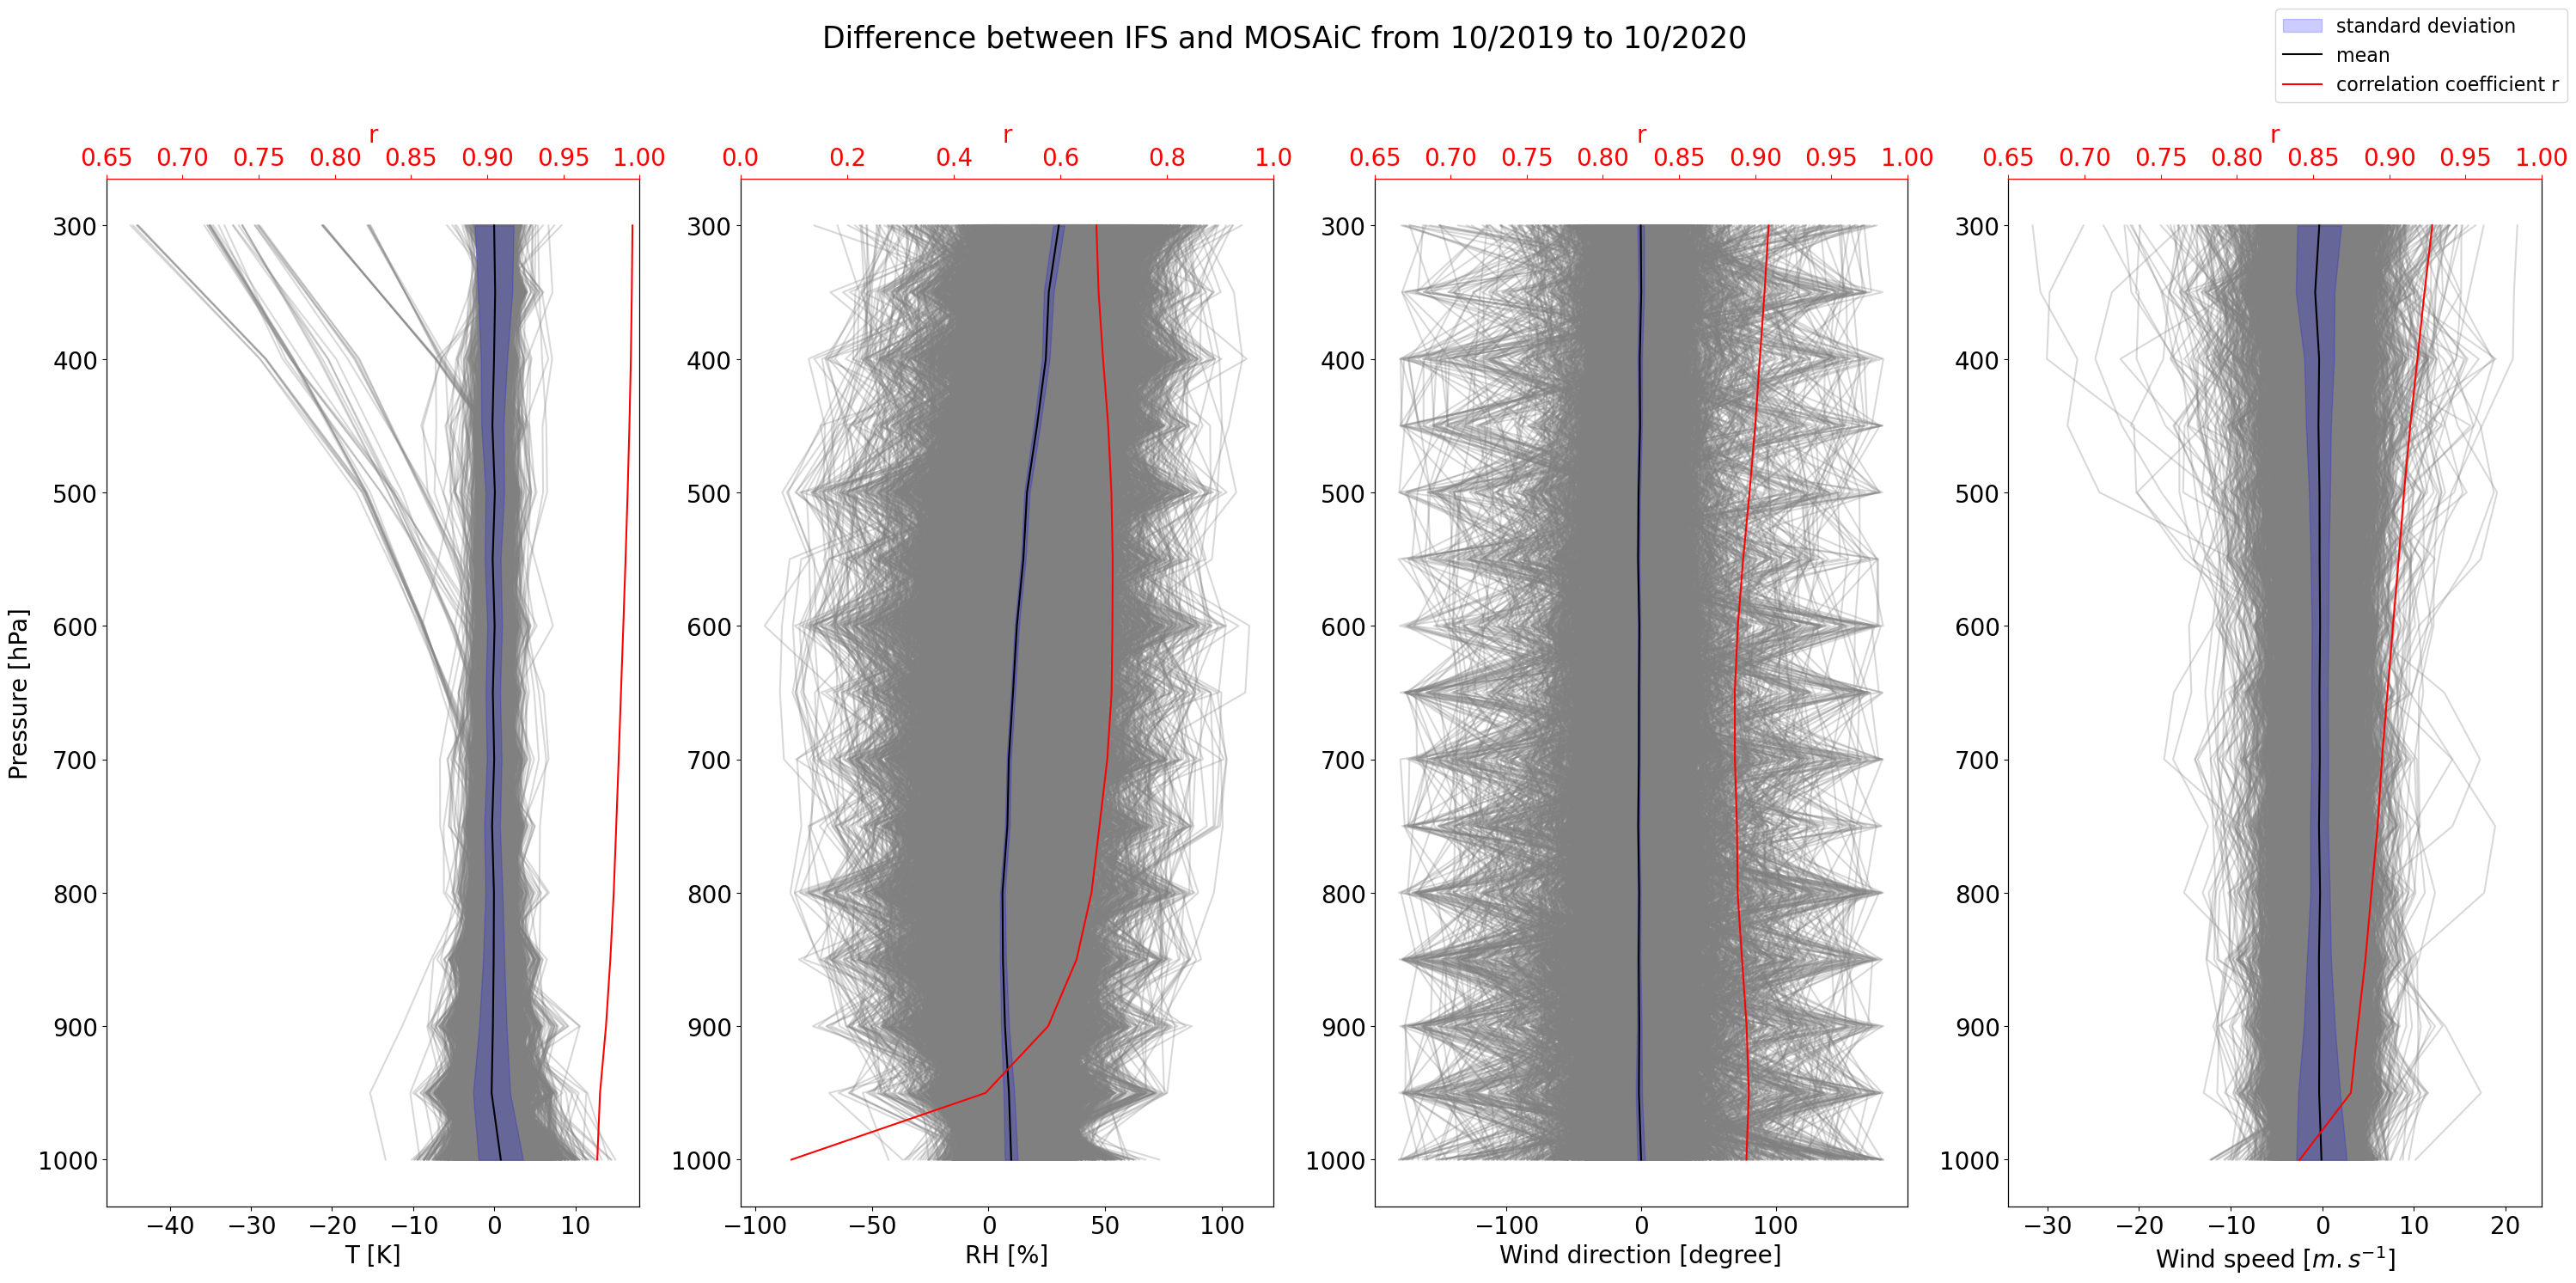

In [32]:
plotbiases() #comment this line to not plot figures
#positive = surestimation in ERA5